In [1]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine-date')

In [2]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000

In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target,
                                                                     test_size = 0.2, 
                                                                     random_state = 42)

In [10]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [14]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


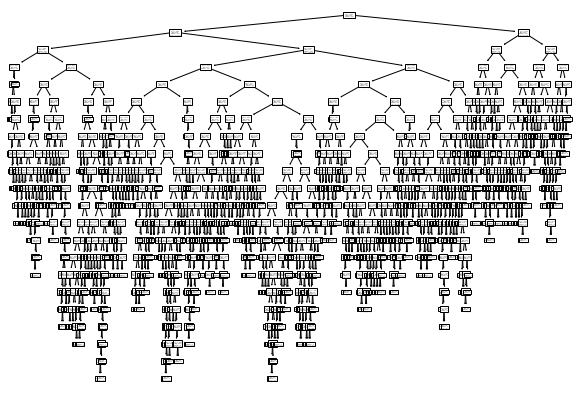

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10, 7))
plot_tree(dt)
plt.show()

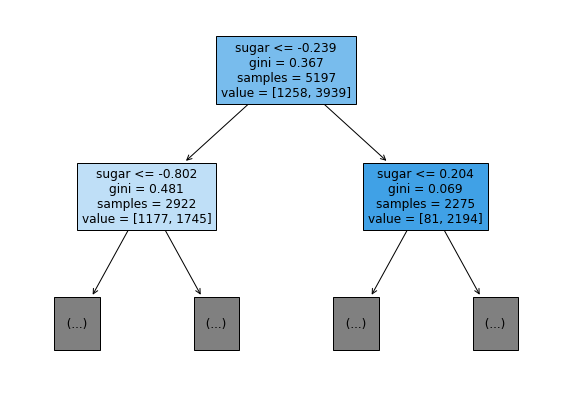

In [21]:
plt.figure(figsize = (10, 7))
plot_tree(dt, max_depth = 1, filled = True,
         feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [23]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


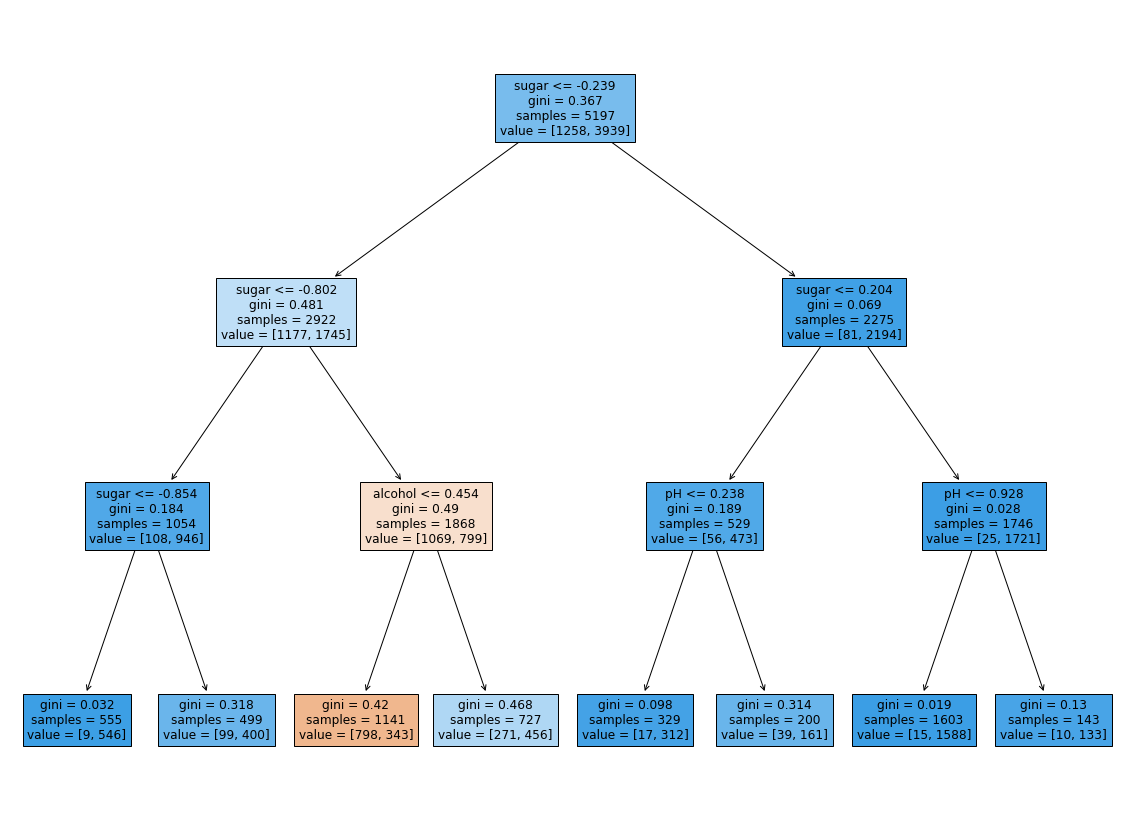

In [24]:
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [26]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


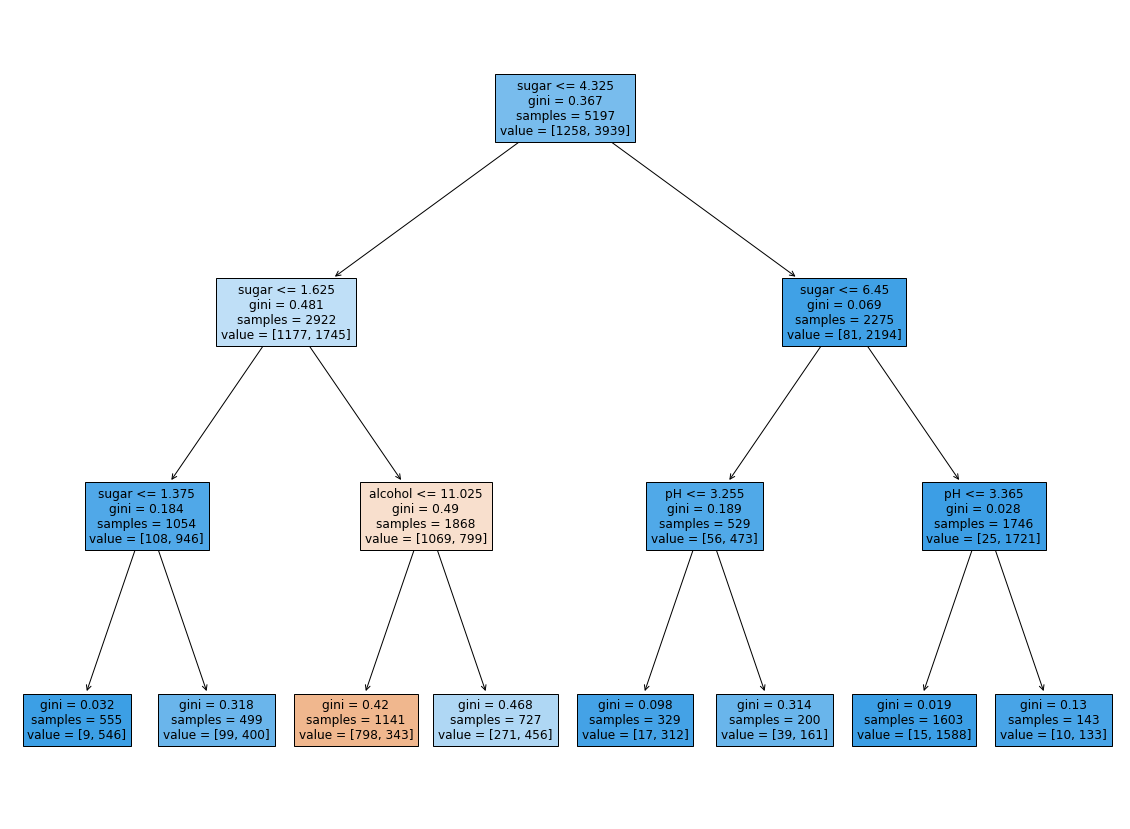

In [27]:
plt.figure(figsize = (20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [28]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


----

In [29]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')

In [30]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [33]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target,
                                                                     test_size = 0.2,
                                                                     random_state = 42)
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target,
                                                               test_size = 0.2,
                                                               random_state = 42)

print(train_input.shape)
print(sub_input.shape, val_input.shape)

(5197, 3)
(4157, 3) (1040, 3)


In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [37]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.02197504, 0.04897261, 0.08346319, 0.07095909, 0.06395793]), 'score_time': array([0.00699496, 0.00299621, 0.02798629, 0.00699735, 0.00499725]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [39]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


In [41]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [42]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv = splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [45]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs = -1)
gs.fit(train_input, train_target)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [46]:
print(gs.best_params_)
print(gs.cv_results_['mean_test_score'])

{'min_impurity_decrease': 0.0001}
[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [47]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [48]:
parmas = {'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001),
         'max_depth':range(5, 20, 1),
         'min_samples_split':range(2, 100, 10)}

In [50]:
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs = -1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [52]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [53]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8681929740134745


In [54]:
from scipy.stats import uniform, randint

rgen = randint(0, 10)
rgen.rvs(10)

array([8, 8, 0, 3, 7, 3, 9, 5, 2, 4])

In [55]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 86, 103,  97,  96,  83, 106, 100, 117, 112, 100], dtype=int64))

In [57]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.53816048, 0.18939685, 0.75193682, 0.38615519, 0.760228  ,
       0.82337385, 0.82474286, 0.95857988, 0.0155194 , 0.34696696])

In [58]:
np.unique(rgen.rvs(1000), return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([104,  97,  93, 103,  92,  95, 116, 120,  94,  86], dtype=int64))

In [59]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.03206124, 0.49870148, 0.23864547, 0.61043951, 0.25219968,
       0.89153046, 0.28264751, 0.48233283, 0.26513303, 0.83957203])

In [66]:
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
         'max_depth' : randint(20, 50),
         'min_samples_split' : randint(2, 25),
         'min_samples_leaf' : randint(1, 25)}

In [67]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), params,
                      n_iter = 100, n_jobs =- 1, random_state = 42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024F8DFE54C0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024F8DC02610>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024F8DFE5670>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024F8DFA65B0>},
                   random_state=42)

In [68]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [69]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [72]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


---

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine-date')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, 
                                                                      test_size = 0.2,
                                                                      random_state = 42)

In [74]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)

In [77]:
scores = cross_validate(rf, train_input, train_target,
                         return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [78]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [79]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state = 42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [81]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target,
                       return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [82]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gb, train_input, train_target,
                       return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [85]:
gd = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.2,
                               random_state = 42)
scores = cross_validate(gb, train_input, train_target,
                       return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [87]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state = 42)
scores = cross_validate(hgb, train_input, train_target,
                        return_train_score = True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [88]:
hgb.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [90]:
hgb.score(test_input, test_target)

0.8723076923076923

In [93]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state = 42)
scores = cross_validate(xgb, train_input, train_target,
                       return_train_score = True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

C:\Users\USER\anaconda3\envs\py38tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\py38tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\py38tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\py38tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\py38tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9555033709953124 0.8799326275264677


In [92]:
pip install xgboost

In [97]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state = 42)
scores = cross_validate(lgb, train_input, train_target,
                       return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


In [95]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.
